In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('DataFile/Customers.csv', parse_dates=['SignupDate'])
transactions = pd.read_csv('DataFile/Transactions.csv', parse_dates=['TransactionDate'])
print("dataset succefssfully loaded")

dataset succefssfully loaded


In [2]:
# Merge customers and transactions
merged_data = pd.merge(customers, transactions, on='CustomerID', how='inner')

# Aggregate transaction data for each customer
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum', 
    'TransactionID': 'count',  
    'Price': 'mean', 
    'Region': 'first', 
    'SignupDate': 'first'
}).reset_index()

customer_features['SignupDate'] = (customer_features['SignupDate'] - customer_features['SignupDate'].min()).dt.days

encoder = OneHotEncoder()
region_encoded = encoder.fit_transform(customer_features[['Region']]).toarray()

numerical_features = customer_features[['TotalValue', 'TransactionID', 'Price', 'SignupDate']]
feature_matrix = np.hstack([numerical_features.values, region_encoded])

# Normalize features
scaler = MinMaxScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)
print("all features are successfully scaled")

all features are successfully scaled


warning is silenced
Clusters: 2, DB Index: 1.1329, Silhouette Score: 0.3166
Clusters: 3, DB Index: 1.0038, Silhouette Score: 0.4784
Clusters: 4, DB Index: 0.5861, Silhouette Score: 0.6284
Clusters: 5, DB Index: 0.8104, Silhouette Score: 0.5472
Clusters: 6, DB Index: 0.9504, Silhouette Score: 0.4902
Clusters: 7, DB Index: 0.9826, Silhouette Score: 0.4707
Clusters: 8, DB Index: 1.1834, Silhouette Score: 0.3364
Clusters: 9, DB Index: 1.1827, Silhouette Score: 0.3176
Clusters: 10, DB Index: 1.1714, Silhouette Score: 0.3083
Optimal Clusters: 2, DB Index: 1.1329


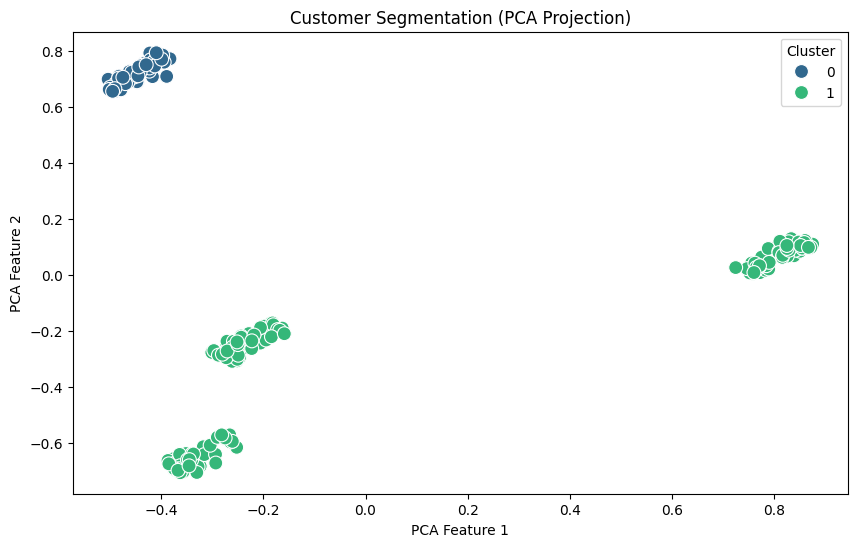

Clustering results saved to Data/Ashutosh_Chauhan_Clustering.csv


In [ ]:
# Perform clustering
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
print("warning is silenced")

optimal_clusters = None
db_index_values = []
silhouette_values = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(feature_matrix_scaled)

    db_index = davies_bouldin_score(feature_matrix_scaled, cluster_labels)
    silhouette_avg = silhouette_score(feature_matrix_scaled, cluster_labels)

    db_index_values.append(db_index)
    silhouette_values.append(silhouette_avg)

    print(f"Clusters: {k}, DB Index: {db_index:.4f}, Silhouette Score: {silhouette_avg:.4f}")

    if optimal_clusters is None or db_index < min(db_index_values):
        optimal_clusters = (k, db_index)

# Choose optimal number of clusters
k_optimal, db_optimal = optimal_clusters
print(f"Optimal Clusters: {k_optimal}, DB Index: {db_optimal:.4f}")

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
final_labels = kmeans.fit_predict(feature_matrix_scaled)

customer_features['Cluster'] = final_labels

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(feature_matrix_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=final_labels, palette='viridis', s=100)
plt.title('Customer Segmentation (PCA Projection)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Cluster')
plt.show()


output_path = "Data/Ashutosh_Chauhan_Clustering.csv"
customer_features.to_csv(output_path, index=False)
print(f"Clustering results saved to {output_path}")
